# Data Analytics Iris Research
***

## Imports
***

In [69]:
#Data frames import
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets

## Data Import
***

In [70]:
# Define column names for the dataset
column_names = ['Sepal length(cm)', 'Sepal width(cm)', 'Petal length(cm)', 'Petal width(cm)', 'Class plants']

In [71]:
# Load the dataset specifying no headers in the file itself
data_path = 'data\iris.data'  # Path to the file
iris_df = pd.read_csv(data_path, header=None, names=column_names)

## Inspect Data
***

In [72]:
# Show data
iris_df

,Sepal length(cm),Sepal width(cm),Petal length(cm),Petal width(cm),Class plants
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [73]:
iris_df.iloc[1]

Sepal length(cm)            4.9
Sepal width(cm)             3.0
Petal length(cm)            1.4
Petal width(cm)             0.2
Class plants        Iris-setosa
Name: 1, dtype: object

In [74]:
# Show info Datafraim
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Sepal length(cm)  150 non-null    float64
 1   Sepal width(cm)   150 non-null    float64
 2   Petal length(cm)  150 non-null    float64
 3   Petal width(cm)   150 non-null    float64
 4   Class plants      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [75]:
#Count a number of each Iris plant
iris_df['Class plants'].value_counts()

Class plants
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [76]:
#Describe the data set
iris_df.describe()

,Sepal length(cm),Sepal width(cm),Petal length(cm),Petal width(cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [77]:
# All data inspection head
iris_df.head()

,Sepal length(cm),Sepal width(cm),Petal length(cm),Petal width(cm),Class plants
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Data modeling
***

In [78]:
# Print Species unique value
iris_df['Class plants'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [79]:
# Species object modify to category
iris_df['Class plants'] = iris_df['Class plants'].astype('category')

## Missing data
---

In [80]:
# Check for any missing values in the DataFrame
missing_data = iris_df.isnull().sum()
print("Missing values in each column:\n", missing_data)

Missing values in each column:
 Sepal length(cm)    0
Sepal width(cm)     0
Petal length(cm)    0
Petal width(cm)     0
Class plants        0
dtype: int64


## Save Data in File
***

In [81]:
# Open the file for recording
with open("iris_summary.txt", "w") as file:
    for column in iris_df.columns:
        # Get summary information on variables
        summary = iris_df[column].describe()

        # Write the name of the variable and summary information to a file
        file.write(f"Summary information for {column}:\n")
        file.write(summary.to_string())
        file.write("\n\n")  # Add devide string
    print("Export success")

Export success


## Histogram
***


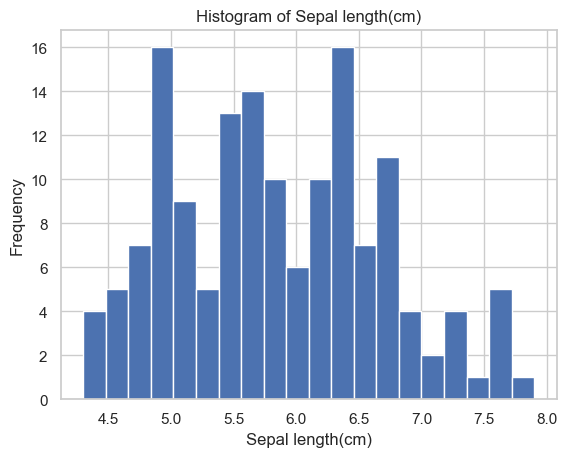

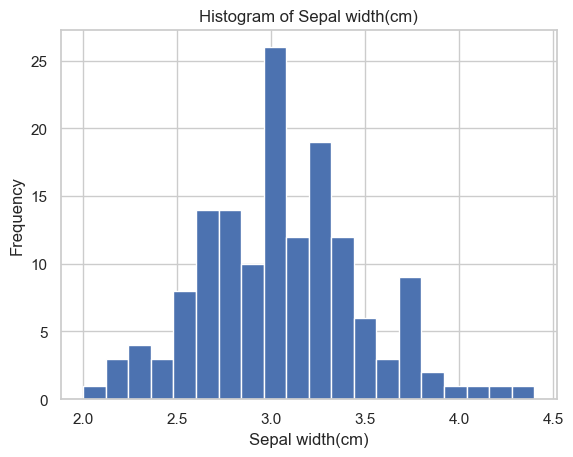

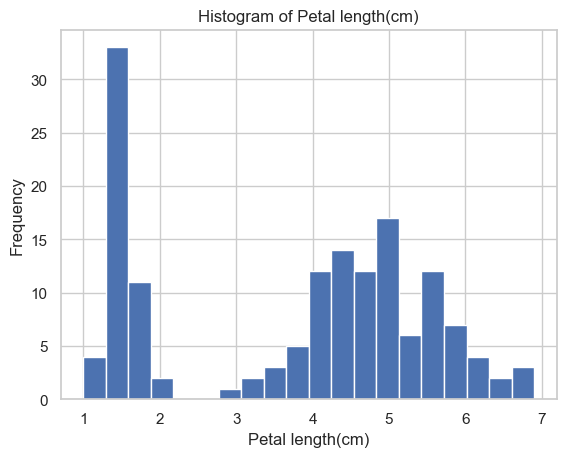

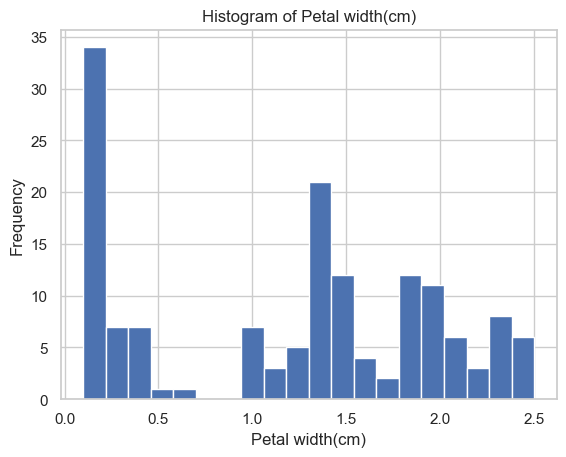

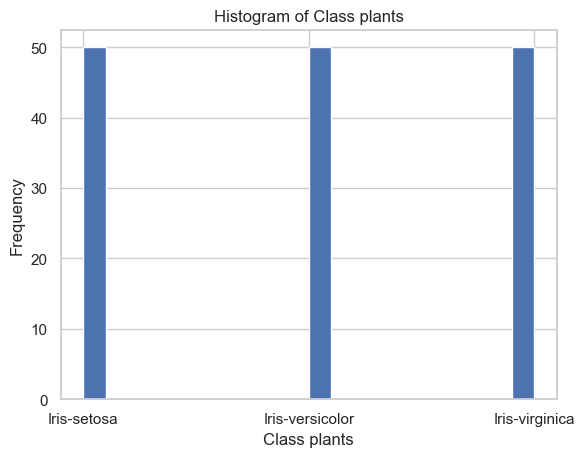

In [82]:
# Creating and saving histograms
for column in iris_df.columns:
    plt.figure()
    iris_df[column].hist(bins=20)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    # Saving the histogram to a file
    plt.savefig(f'images/{column.replace(" ", "_")}.png')
    plt.show()
    plt.close()

## Scatter Plot
***

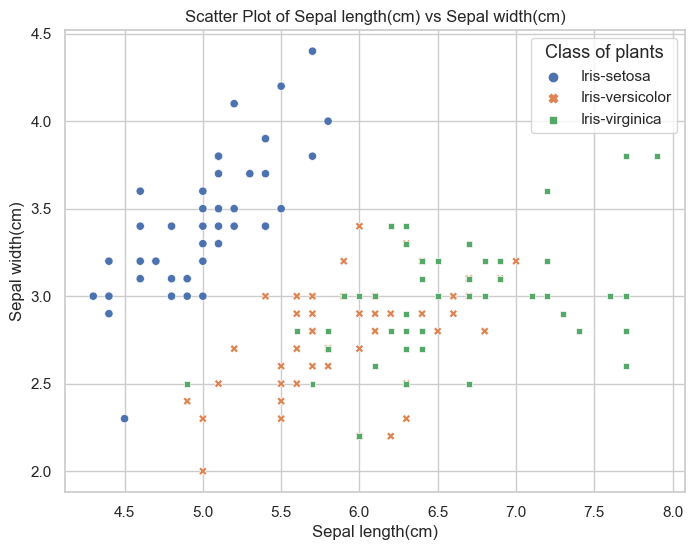

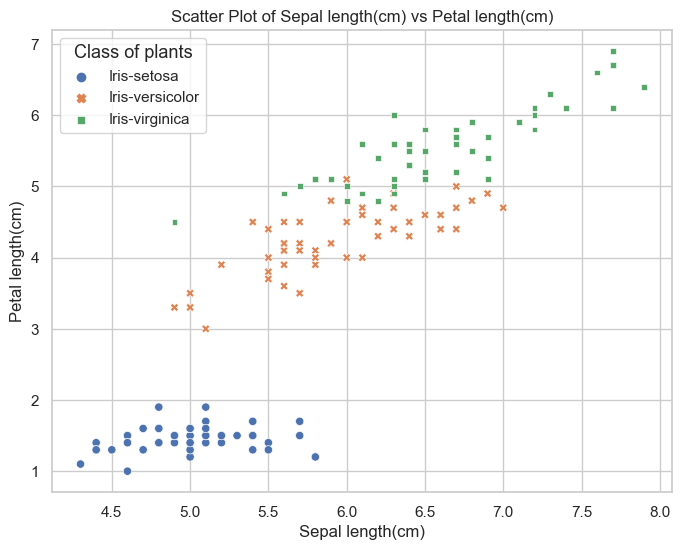

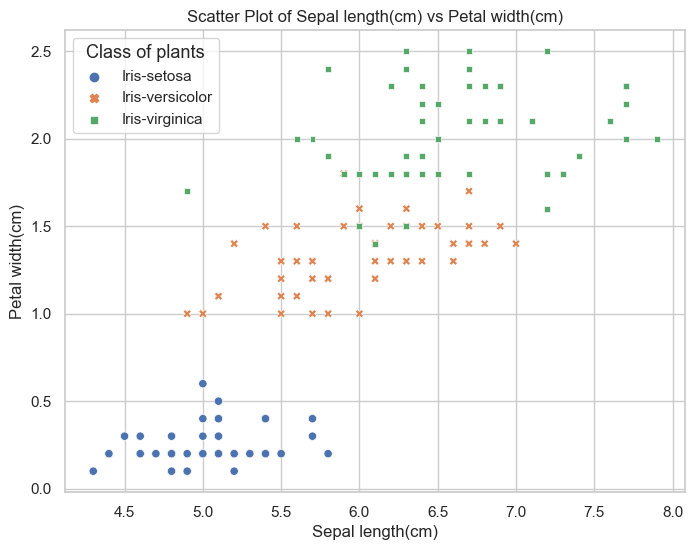

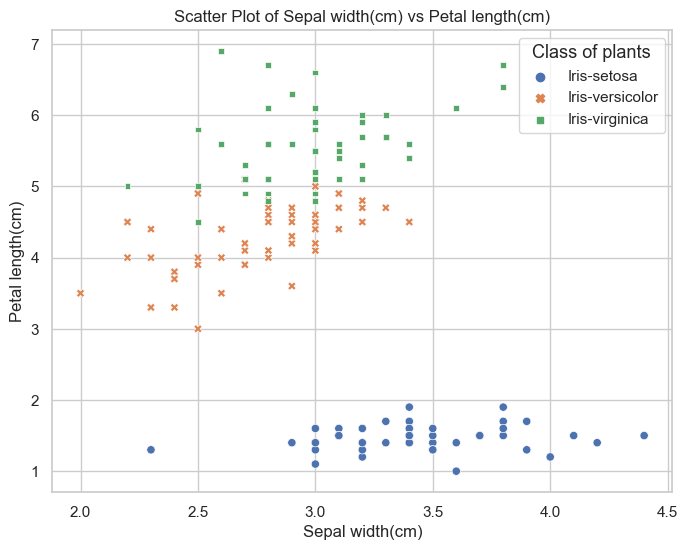

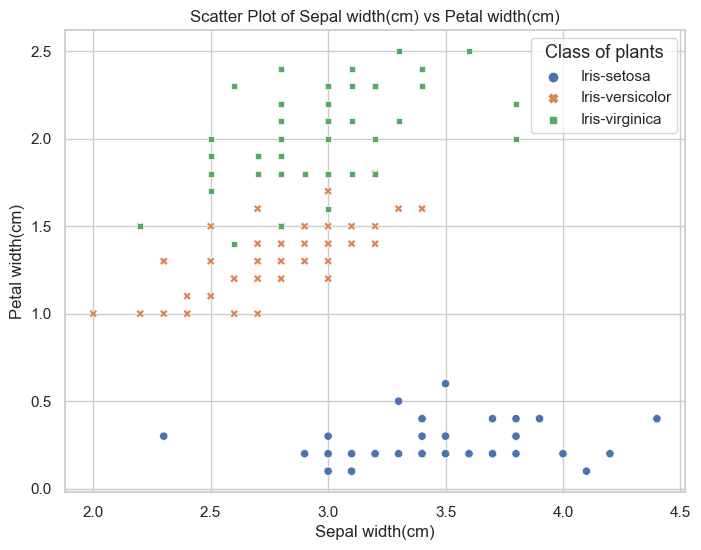

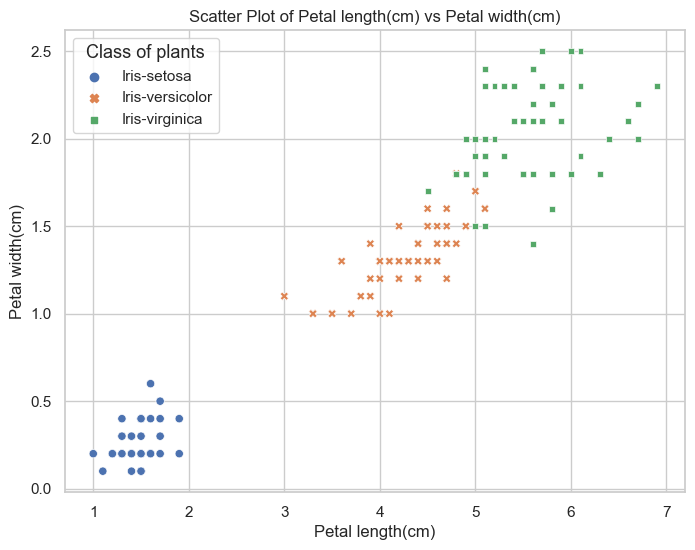

In [83]:
# Exclude last collum with names
scatter_data = iris_df.columns[:-1]

# Creating and saving Scatter plots
for i, var1 in enumerate(scatter_data):
    for var2 in scatter_data[i+1:]:
        plt.figure(figsize=(8, 6))
        scatter_plot = sns.scatterplot(data=iris_df, x=var1, y=var2, hue='Class plants', style='Class plants', palette='deep')
        scatter_plot.set_title(f'Scatter Plot of {var1} vs {var2}')
        plt.legend(title='Class of plants', title_fontsize='13', fontsize='11')
        # Save plots
        plt.savefig(f'images/{var1}_vs_{var2}_scatter.png')
        plt.show()
        plt.close()

## 3D Plot Visualisation
***

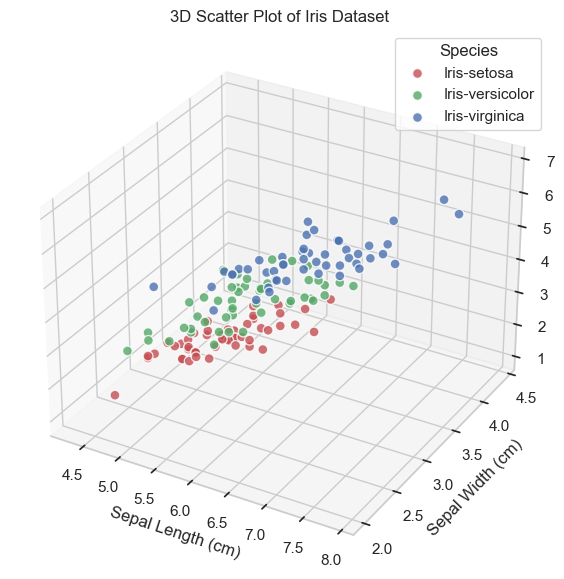

In [84]:
unique_species = iris_df['Class plants'].unique()

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

colors = ['r', 'g', 'b']

for species, color in zip(unique_species, colors):
    indices = iris_df['Class plants'] == species
    ax.scatter(iris_df.loc[indices, 'Sepal length(cm)'],
               iris_df.loc[indices, 'Sepal width(cm)'],
               iris_df.loc[indices, 'Petal length(cm)'],
               c=color,
               s=50,  
               label=species,
               alpha=0.8, 
               edgecolors='w') 

ax.set_xlabel('Sepal Length (cm)')
ax.set_ylabel('Sepal Width (cm)')
ax.set_zlabel('Petal Length (cm)')
ax.legend(title="Species")
ax.set_title('3D Scatter Plot of Iris Dataset')
# Save plots
plt.savefig(f'images/3D Scatter Plot of Iris Dataset.png')

plt.show()

# End
***